# 5. K-Means


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('KMeansData.csv')
X = dataset.iloc[:, :].values
X = dataset.values
X = dataset.to_numpy() # 공홈 권장 (위 두개와 같음)

### 데이터 시각화

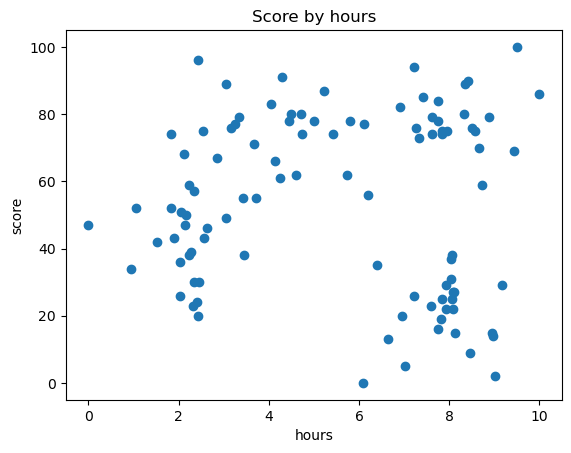

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

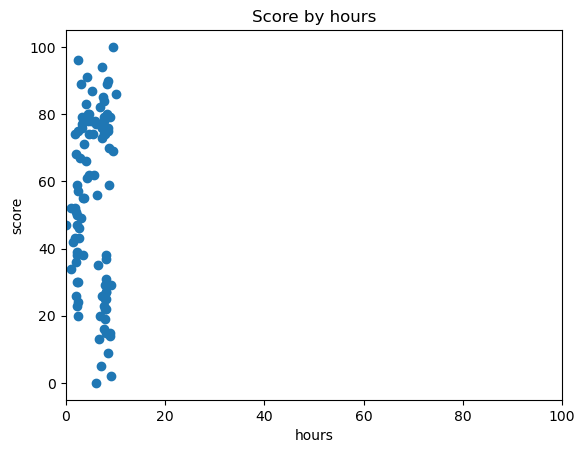

In [3]:
# 실제 거리
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0,100)
plt.show()

### 피처 스케일링 feature Scailing

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # 경고문 처리, import StandardScaler 전에 해줘야함

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) # X 데이터에 대해서 자동 스케일링
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

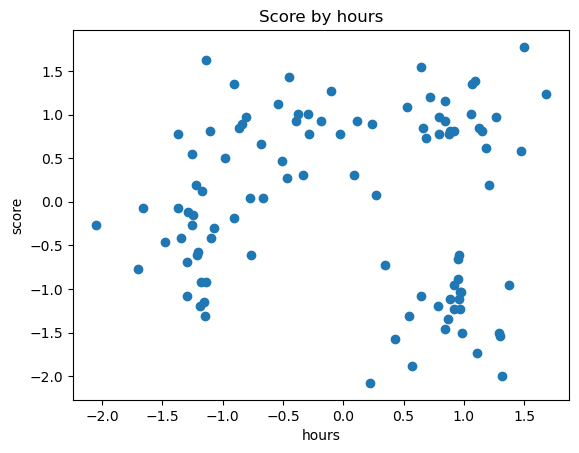

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()
# 범주의 범위가 같아짐

### 최적의 K값 찾기 (엘보우 방식)

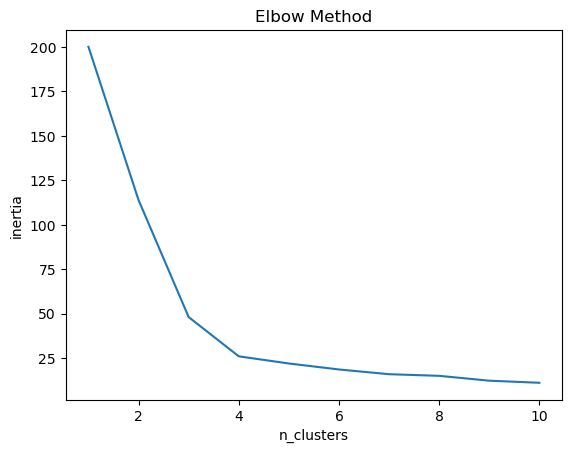

In [6]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, init="k-means++") # k-means는 랜덤 중심점이라 문제가 있으니 개선된 k-means++ 방식으로 시작하겠다
    kmeans.fit(X)
    dd = kmeans.inertia_    # 각 점으로부터 클러스터의 중심(centroid)까지의 거리 제곱의 합
    inertia_list.append(dd)

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia') # '각 점으로부터 중심점'의 거리
plt.show()

In [7]:
K = 4 # 최적의 K
kmeans = KMeans(n_clusters=4, random_state=0) # init은 사실 default가 k-means++
y_kmeans = kmeans.fit_predict(X) # 학습 후, 예측값 반환

In [8]:
y_kmeans # 클러스터의 번호로 분류

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화

In [12]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

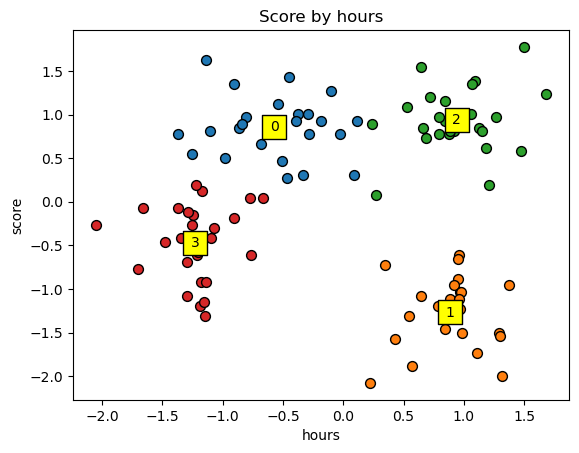

In [20]:
for cluster in range(K):
    plt.scatter(
        X[y_kmeans==cluster, 0],    # np도 True, False로 필터링이 됨 // X[조건, 열]
        X[y_kmeans==cluster, 1],
        s=50, # 점의 사이즈
        edgecolors='black'
    )
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s') # s: square
    plt.text(centers[cluster, 0], centers[cluster, 1], s=cluster, # s: text
        va='center', ha='center' # 글자 출력 센터정렬
    )

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원상복구)

In [24]:
X_org = sc.inverse_transform(X) # Feature Scaling된 데이터를 원복

In [22]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

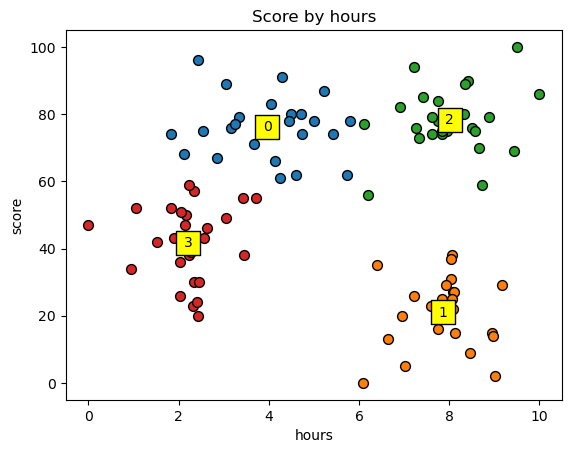

In [25]:
for cluster in range(K):
    plt.scatter(
        X_org[y_kmeans==cluster, 0],    # np도 True, False로 필터링이 됨 // X[조건, 열]
        X_org[y_kmeans==cluster, 1],
        s=50, # 점의 사이즈
        edgecolors='black'
    )
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s') # s: square
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], s=cluster, # s: text
        va='center', ha='center' # 글자 출력 센터정렬
    )

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

##### 0번 그룹은 적게공부하고 성적이 잘나오는 그룹이구나 하는 분석 가능